En este codigo vamos a hacer un proceso parecido al del modelo knn que era de frutas que hicmos hace dos clases

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
import numpy as np

En resumen las librerias son las misma como pandas, matplotlib, numpy, seaborm y pues las librerias sklearn con sus modulos para separar los datos, normalizar los datos, el algorimto KNN, metricas de evaluacion y agrupamiento no supervisado

In [2]:
df = pd.read_csv('knndata.csv')
print(df.head())
print(df.isnull().sum())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

En este bloque de codigo se hace el datafram leyendo el csv como lo usual, se pone el head de los datos los cuales arroja muchos pero con los que trabajaremos mas o algo asi seran los de diagnosis, tambien se checaron los datos nulos, para evitar errores

In [3]:
X_train = df.drop(columns=['diagnosis'])
y_train = df['diagnosis'] 
X_test = df.copy()

print(df['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


En este bloque de codigo se esta haciendo las variables para las cuales vamos a enternar y testear, en xtrian dropeando las columnas que no son diagnosis, y usando solo la columna diagnosis y el test usando el puro dataframe, al final solo estamos imprimiendo los valores de los tumores

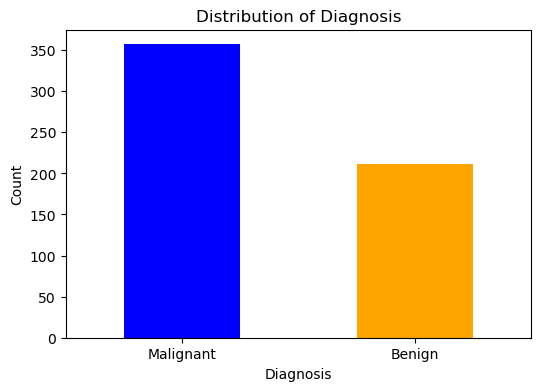

In [4]:
plt.figure(figsize=(6, 4))
df['diagnosis'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Malignant', 'Benign'], rotation=0)
plt.show()

En este bloque de codigo, como en el de las frutas se esta realizando una grafica con las distribuciones en este caso de las diagnosis entre benigno y maligno

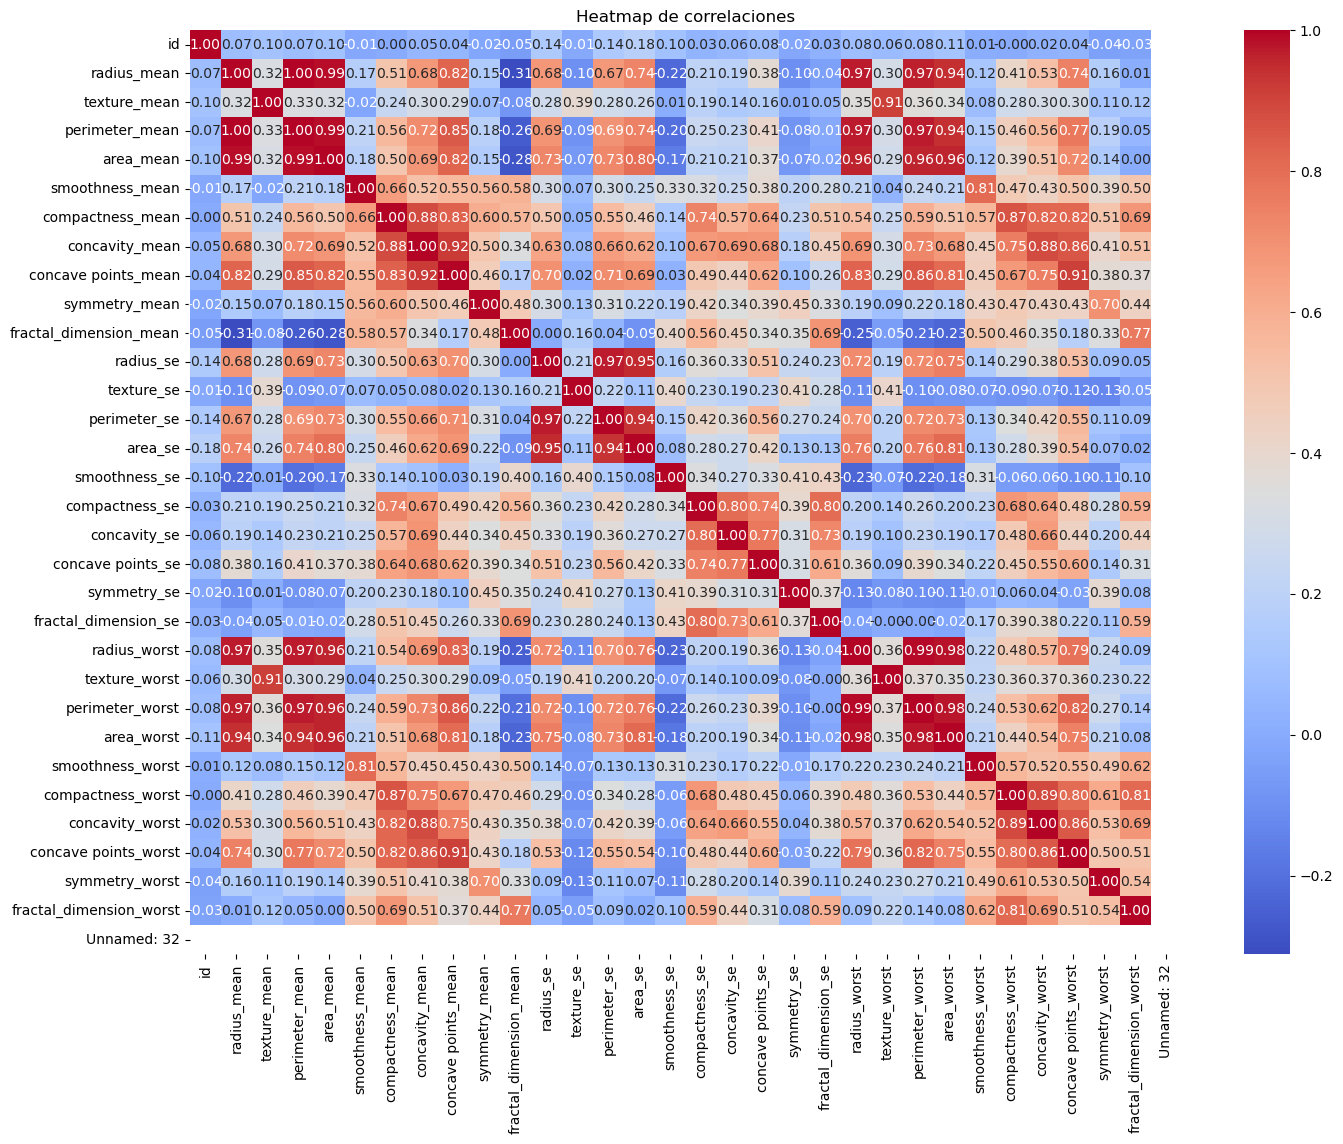

In [5]:
if 'diagnosis' in df.columns:
    numeric_df = df.drop('diagnosis', axis = 1)
else:
    numeric_df = df

plt.figure(figsize=(16,12))
sns.heatmap(numeric_df.corr(), annot = True, cmap = 'coolwarm', fmt='.2f')
plt.title('Heatmap de correlaciones')
plt.show()

En este bloque de codigo hice un if statement para saber diagnosis por si acaso si si esta se dropea con el axis siendo uno si no solo se iguala al dataframe (haciiendo el datafram numerico para hacer el heatmap), despues de hace la grafica utiliazando el df numerico ya antes sacado

In [6]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val)

# Drop the 'diagnosis' column from X_test before scaling
X_test_cleaned = X_test.drop(columns=['diagnosis'], errors='ignore')
X_test_scaled = scaler.transform(X_test_cleaned)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


En este bloque de codigo se sapara los datos como en modelos anterirores para el entreno y el testeo, despues utlizamos el strandadscaler(adjuntado en una variable) para normalizar los datos, despues de separar los datos los normalizamos con el scaler, y tambien me pidio limpiar el xtest(droppeando la columna diagniosis e ignorando los errores) antes de normlizarlo

/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [31]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


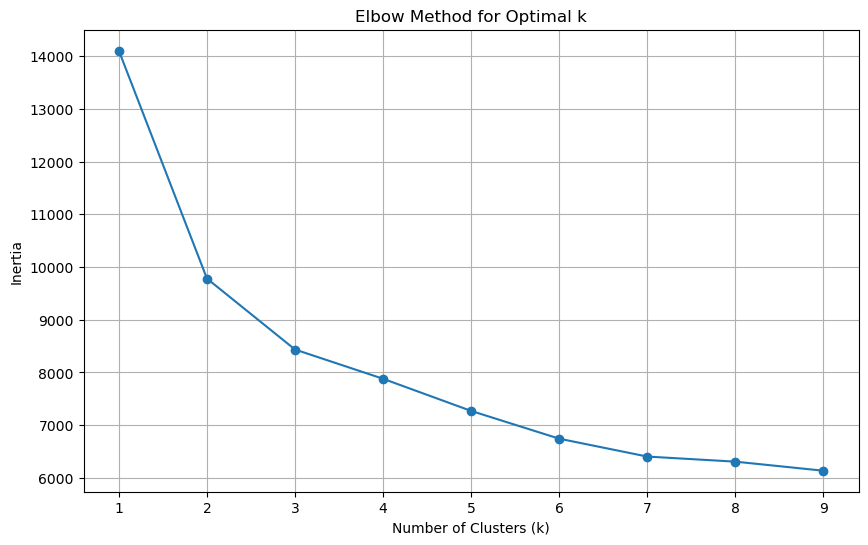

In [7]:
# Handle NaN values by imputing with the mean of each feature
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)

inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled_imputed)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

En este bloque de codigo primero tuve que importar un modulo de sklearn para 'imputear' el xtrain para usarlo en la grafica debido a un eror que me daba, despues como en el otro codo hacemos un for loop con los valores del 1 al 9 como en el otro modulo haciendo los datos mas densos y mejor definidos, para que salga el codo.

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled_imputed, y_train_split)


KNeighborsClassifier(n_neighbors=3)

Aqui ya se esta haciendo el modelo KNN con la variable siendo 3 para que se tome una decision concreta, se hace el fit con el xtrain y el ytrain

Accuracy: 0.95
Classification Report
:               precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [31]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


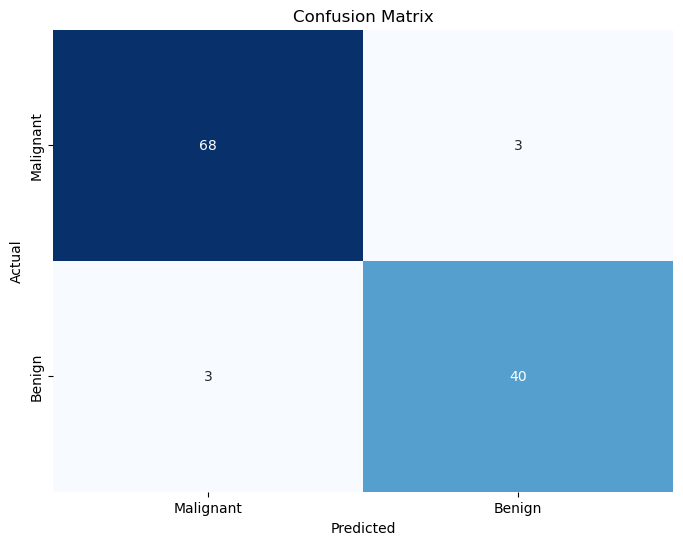

In [9]:
# Impute missing values in X_val_scaled
X_val_scaled_imputed = imputer.transform(X_val_scaled)

accuracy = knn.score(X_val_scaled_imputed, y_val)
conf_matrix = confusion_matrix(y_val, knn.predict(X_val_scaled_imputed))
class_report = classification_report(y_val, knn.predict(X_val_scaled_imputed))
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report\n:', class_report)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Ya por ultimo en este bloque de codigo por los errores que me estaba dando con el xtrain lo transformamos para que rellene datos no existentes y no haya problemas, ya despues sacamos el porcentaje de acerctacion del modelo siendo de 95%, la matriz de confusion y el class report, en la matriz de confusion se hizo un grafica la cual le fue muy bien debido a que en X-Y & -X+Y donde se supone que los datos se supone que se entrecruzan en la matriz y son mayores las cantidades en respecto a la cantidad con la que se hizo. pero no como la otra pero sige siendo bien.

La razon por la le fue bien al modelo fue porque este fue un caso de overfitting debido a que le fue super bien en el entrenamiento y el valor de k fue muy bajo esto porque el modelo se vuelve muy flexible y se memoriza los datos de muy buena manera, si nos habiamos metido en este tema pero usted al explicar el knn dijo que le fue super bien al otro modelo a causa del overfitting pero no se metio al tema